**Description**: Analyze accuracies for $m = 50, n = 50$.

**Estimated runtime**: `model.fit` was ran in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

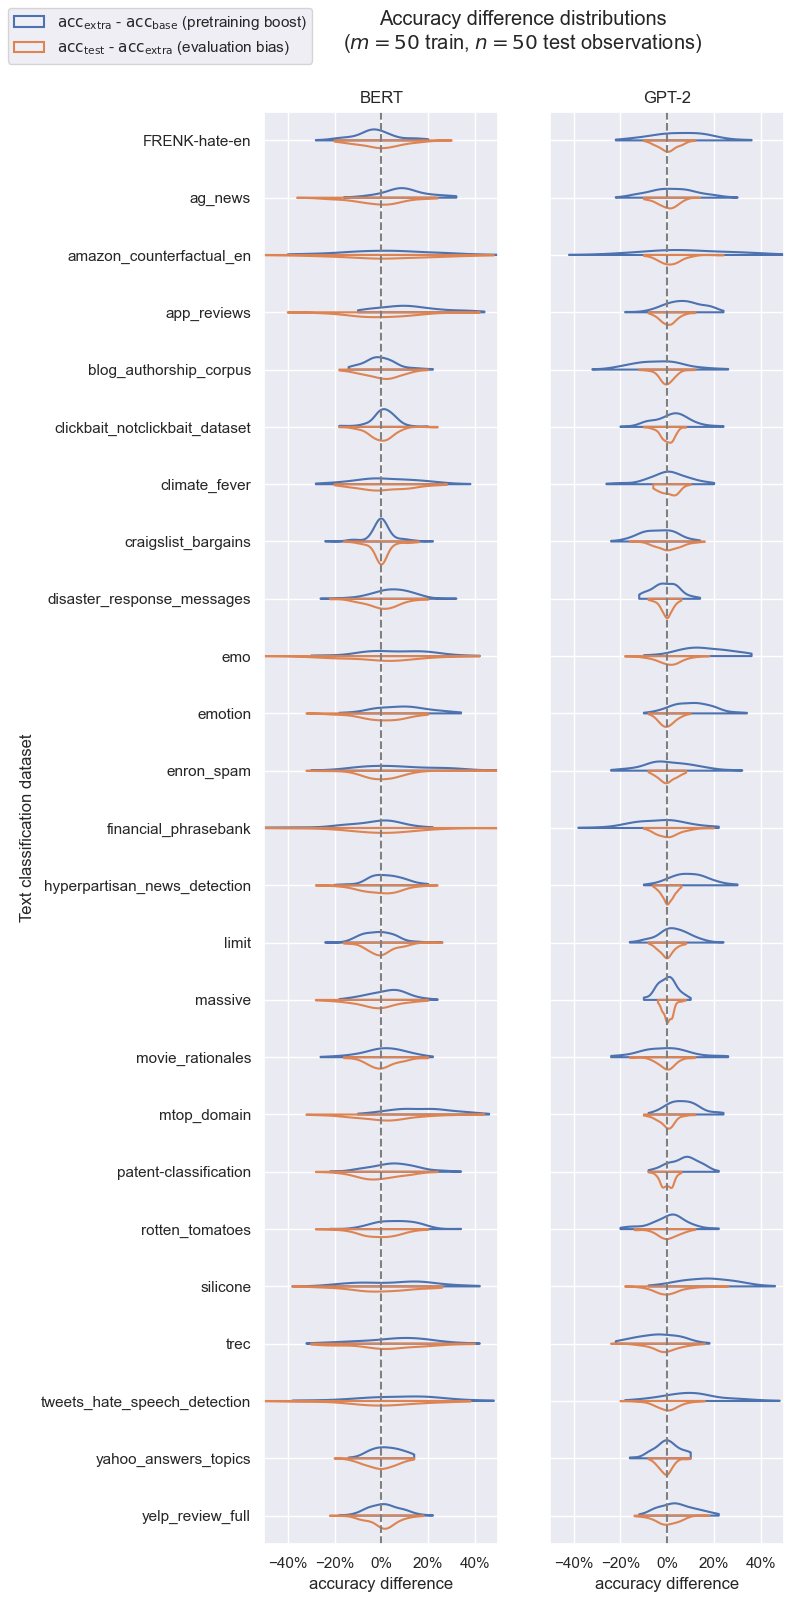

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬─────────┐
│ mean     ┆ se      │
╞══════════╪═════════╡
│ 0.039796 ┆ 0.00884 │
└──────────┴─────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0144,0.011234
"""ag_news""",0.0625,0.010589
"""amazon_counter…",0.0523,0.019004
"""app_reviews""",0.0941,0.01093
"""blog_authorshi…",-0.0213,0.009321
…,…,…
"""silicone""",0.112,0.015039
"""trec""",0.0111,0.013327
"""tweets_hate_sp…",0.0896,0.01542
"""yahoo_answers_…",0.0115,0.006099


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.05845,0.024519
"""ag_news""",0.156457,0.029368
"""amazon_counter…",0.160131,0.044485
"""app_reviews""",0.883135,0.114601
"""blog_authorshi…",-0.024857,0.018684
…,…,…
"""silicone""",0.389403,0.050351
"""trec""",0.171209,0.072573
"""tweets_hate_sp…",0.20825,0.034165
"""yahoo_answers_…",0.416533,0.113105


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [10]:
# model_control, summary_control, az_summary_control = utils.stat_model(
#     num_correct_df,
#     treatment="extra",
#     control="base",
#     equation=equation,
#     id_vars=id_vars,
# )

In [11]:
# print(model_control)

# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.00184 ┆ 0.001269 │
└─────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.0015,0.007364
"""ag_news""",-0.0075,0.008545
"""amazon_counter…",0.0191,0.01497
"""app_reviews""",0.0073,0.011341
"""blog_authorshi…",0.0023,0.005982
…,…,…
"""silicone""",0.0029,0.01069
"""trec""",0.0079,0.011795
"""tweets_hate_sp…",-0.003,0.01357
"""yahoo_answers_…",-0.0056,0.005065


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.01142,0.014015
"""ag_news""",0.003753,0.015339
"""amazon_counter…",0.091497,0.04143
"""app_reviews""",0.176338,0.079785
"""blog_authorshi…",0.012254,0.011971
…,…,…
"""silicone""",0.040451,0.027136
"""trec""",0.249391,0.158031
"""tweets_hate_sp…",0.018041,0.023552
"""yahoo_answers_…",0.095244,0.079754


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [15]:
# model_bias, summary_bias, az_summary_bias = utils.stat_model(
#     num_correct_df,
#     treatment="test",
#     control="extra",
#     equation=equation,
#     id_vars=id_vars,
# )

In [16]:
# print(model_bias)

# Write inference data

Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [17]:
# netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
# if not os.path.exists(netcdfs):
#     os.mkdir(netcdfs)

In [18]:
# summary_control.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
# )

In [19]:
# summary_bias.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
# )